**Lista 1 - Aprendizagem de Máquina**

**Aluno:** José Rubens da Silva Brito

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv')

In [ ]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
# data=data.drop(["Unnamed: 0"], axis=1, inplace=True)

**Calcular a matriz covariância S**

In [ ]:
covariancia = data.cov()

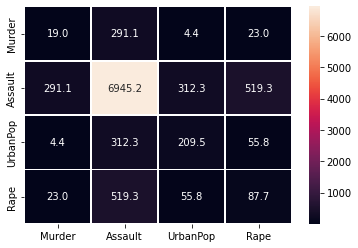

In [ ]:
sn.heatmap(covariancia, annot = True, fmt=".1f", linewidths=.6)

**Autovalor e autovetor de S**

In [ ]:
autovalores_Cov, autovetores_Cov = np.linalg.eig(covariancia)

In [ ]:
print(f'Covariância:\n\nAuto Valores: {autovalores_Cov}\n\n Auto Vetores: {autovetores_Cov}')

Covariância:

Auto Valores: [7.01111485e+03 2.01992366e+02 6.16424618e+00 4.21126508e+01]

 Auto Vetores: [[ 0.04170432  0.04482166 -0.99492173  0.07989066]
 [ 0.99522128  0.05876003  0.0389383  -0.06756974]
 [ 0.04633575 -0.97685748 -0.05816914 -0.20054629]
 [ 0.0751555  -0.20071807  0.07232502  0.97408059]]



**(2) Calcular a matriz correlação R**

In [ ]:
correlation = data.corr()

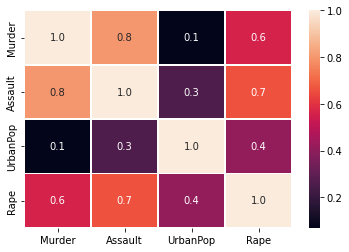

In [ ]:
sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

**Autovalor e autovetor de R**

In [ ]:
autovalores_Cor, autovetores_Cor = np.linalg.eig(correlation)

In [ ]:
print(f'Correloação:\n\nAuto Valores: {autovalores_Cor}\n\n Auto Vetores: {autovetores_Cor}')

Correloação:

Auto Valores: [2.48024158 0.98976515 0.17343009 0.35656318]

 Auto Vetores: [[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]



**(3) Calcular a contribuição de cada componente principal.**





In [ ]:
pca = PCA(n_components=4)
X= data.iloc[:,1:]

In [ ]:
pca.fit(X)

PCA(n_components=4)

In [ ]:
np.round(pca.explained_variance_ratio_,3) #Contruição individual dos n componentes para a variabilidade dos dados

array([0.966, 0.028, 0.006, 0.001])

In [ ]:
pca.explained_variance_ratio_.cumsum() #Variabilidade dos dados através da soma cumulativa dos componentes 

array([0.96553422, 0.99335156, 0.99915109, 1.        ])

Nota-se que apenas com um componente, consegue-se obter uma grande contribuição na variabilidade 

**(4) Encontra o número k tal que as contribuições acumulam 90% ou mais de
proporção da variância total.**

Text(0, 0.5, 'Porcentagem de Variancia')

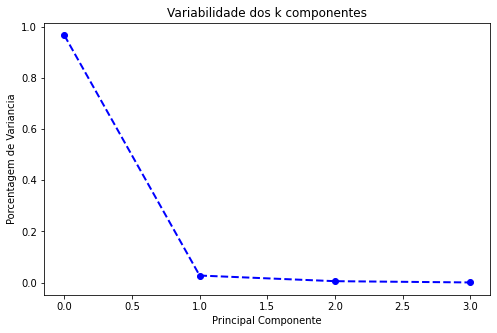

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_, '--bo', linewidth=2)
plt.title('Variabilidade dos k componentes')
plt.xlabel('Principal Componente')
plt.ylabel('Porcentagem de Variancia')